<h1><b>Problem Statement</h1>
<h3>Develop a model for predicting fraudulent transactions for a financial company and use insights from the model to develop an actionable plan.</B></h3>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
data=pd.read_csv('/content/gdrive/My Drive/Fraud.csv')

In [ ]:
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


Dataset  columns description:

* step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

* type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

* amount - amount of the transaction in local currency.

* nameOrig - customer who started the transaction

* oldbalanceOrg - initial balance before the transaction

* newbalanceOrig - new balance after the transaction

* nameDest - customer who is the recipient of the transaction

* oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

* newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

* isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

* isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [ ]:
data.shape

(6362620, 11)

**Data analysis**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


In [ ]:
data.duplicated().sum()

0

In [ ]:

data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

**Checking the mismatch in balance after transaction**

In [ ]:
data['type'].unique()


array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [ ]:
cash_in=data.loc[data["type"]=="CASH_IN"]
cash_in

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
389,1,CASH_IN,143236.26,C1862994526,0.00,143236.26,C1688019098,608932.17,97263.78,0,0
390,1,CASH_IN,228451.89,C1614133563,143236.26,371688.15,C2083562754,719678.38,1186556.81,0,0
391,1,CASH_IN,35902.49,C839771540,371688.15,407590.65,C2001112025,49003.30,0.00,0,0
392,1,CASH_IN,232953.64,C1037163664,407590.65,640544.28,C33524623,1172672.27,1517262.16,0,0
393,1,CASH_IN,65912.95,C180316302,640544.28,706457.23,C1330106945,104198.26,24044.18,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362253,718,CASH_IN,188888.89,C1459052107,51838.00,240726.89,C1955750585,0.00,0.00,0,0
6362271,718,CASH_IN,27919.60,C562982749,2413.00,30332.60,C240654881,512791.59,484871.98,0,0
6362279,718,CASH_IN,78988.38,C886862695,204464.00,283452.38,C262804200,108724.19,29735.81,0,0
6362298,718,CASH_IN,18000.26,C50108853,63409.00,81409.26,C204102272,28088.61,10088.34,0,0


* mismatch in account of customer who started the transaction

In [ ]:
if data['type'].iloc[0] != 'CASH_IN':
      mismatch_org = (data["oldbalanceOrg"] - data["amount"] != data["newbalanceOrig"]).astype(int)
else:
      mismatch_org = (data["oldbalanceOrg"] + data["amount"] != data["newbalanceOrig"]).astype(int)


In [ ]:
pd.DataFrame(mismatch_org)

,0
0,0
1,0
2,0
3,0
4,0
...,...
6362615,0
6362616,0
6362617,0
6362618,0


In [ ]:
mismatch_org.value_counts()

1    5413997
0     948623
dtype: int64

In [ ]:
print("Balance Mismatch(%) at the origin:",round(mismatch_org.value_counts()[1]/data.shape[0] * 100,2))


Balance Mismatch(%) at the origin: 85.09


* mismatch in account of customer who is the recipient of the transaction

In [ ]:
if data['type'].iloc[0] != 'CASH_IN':
   Balance_mismatch_dest = (data["oldbalanceDest"] + data["amount"] != data["newbalanceDest"]).astype(int)
else:
    Balance_mismatch_dest = (data["oldbalanceDest"] - data["amount"] != data["newbalanceDest"]).astype(int)

Balance_mismatch_dest.value_counts()

1    4736674
0    1625946
dtype: int64

In [ ]:
print("Balance Error(%) at the destination:",round(Balance_mismatch_dest.value_counts()[1]/data.shape[0] * 100,2))

Balance Error(%) at the destination: 74.45


--> From above we can conclude that mismatch in balance appear in both recipient and origin end

**checking the number fraud transactions in mismatched balance accounts**

In [ ]:
balance_error=pd.DataFrame(mismatch_org)
balance_error

,0
0,0
1,0
2,0
3,0
4,0
...,...
6362615,0
6362616,0
6362617,0
6362618,0


In [ ]:
balance_error.rename(columns={0:'mismatch_org'},inplace="True")
balance_error

,mismatch_org
0,0
1,0
2,0
3,0
4,0
...,...
6362615,0
6362616,0
6362617,0
6362618,0


In [ ]:
Balance_mismatch_dest=pd.DataFrame(Balance_mismatch_dest)
Balance_mismatch_dest.rename(columns={0:'mismatch_dest'},inplace="True")
Balance_mismatch_dest

,mismatch_dest
0,1
1,1
2,1
3,1
4,1
...,...
6362615,0
6362616,1
6362617,1
6362618,1


In [ ]:
balance_error['isFraud']=data['isFraud']
balance_error['mismatch_dest']=Balance_mismatch_dest['mismatch_dest']

In [ ]:
print(balance_error['mismatch_dest'].dtype)
print(balance_error['mismatch_org'].dtype)
print(balance_error['isFraud'].dtype)

int64
int64
int64


In [ ]:
balance_error[balance_error.isFraud==1]['mismatch_dest'].value_counts()

1    5324
0    2889
Name: mismatch_dest, dtype: int64

In [ ]:
balance_error[balance_error.isFraud==1]['mismatch_org'].value_counts()

0    8086
1     127
Name: mismatch_org, dtype: int64

In [ ]:
balance_error.loc[(balance_error['isFraud'] == 1) & (balance_error['mismatch_org'] == 1)]

,mismatch_org,isFraud,mismatch_dest
724,1,1,1
1911,1,1,0
4440,1,1,1
14861,1,1,1
25875,1,1,1
...,...,...,...
6362462,1,1,1
6362506,1,1,1
6362528,1,1,1
6362582,1,1,1


In [ ]:
balance_error.loc[(balance_error['isFraud'] == 1) & (balance_error['mismatch_dest'] == 1)]

,mismatch_org,isFraud,mismatch_dest
2,0,1,1
3,0,1,1
251,0,1,1
252,0,1,1
680,0,1,1
...,...,...,...
6362614,0,1,1
6362616,0,1,1
6362617,0,1,1
6362618,0,1,1


* In origin(customer who started the transaction) 127 transactions is reported as fraud transactions
*  5324 transactions in recipient end is reported as fraud transactions

<b> Checking the number of fraud transaction</b>

In [ ]:
data['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

Number of fraud transactions:8213

<b> checking total number of flagged fraud transactions</b>

In [ ]:
data['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

Number of flagged fraud transaction:16

<b>Checking which type of transactions contains fraud transactions</b>

In [ ]:
df=data.loc[data["isFraud"]==1]
df



,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [ ]:
df=data.loc[data["isFraud"]==1]
print('length of is fraud cases',len(df))
print('type of transaction',df['type'].unique())
print("minimum amount of transacrion in fraud'",df['amount'].min())
print("maximum amount of transacrion in fraud'",df['amount'].max())

length of is fraud cases 8213
type of transaction ['TRANSFER' 'CASH_OUT']
minimum amount of transacrion in fraud' 0.0
maximum amount of transacrion in fraud' 10000000.0


In [ ]:
print(df[df.amount<=0]['type'].value_counts())

CASH_OUT    16
Name: type, dtype: int64


In [ ]:
df[df.isFraud==1]['type'].value_counts()

CASH_OUT    4116
TRANSFER    4097
Name: type, dtype: int64

In [ ]:
data[data.amount<=0]['isFraud'].value_counts()[1] == len(data[data.amount<=0])


True

In [ ]:
df1=df.loc[df["isFlaggedFraud"]==1]
print(df1['type'].value_counts())
print('minimum amount of transacrion in flagged fraud',df1['amount'].min())
print('maximum amount of transacrion in flagged fraud',df1['amount'].max())


TRANSFER    16
Name: type, dtype: int64
minimum amount of transacrion in flagged fraud 353874.22
maximum amount of transacrion in flagged fraud 10000000.0


* Every fraud transcations belongs to Transfer and cash_out type
* All isFlaggedFraud transactios are belonged in Transfer type
* 16 transaction with amount less than or equal to 0 and all that transactions are fraud transaction

**EDA**

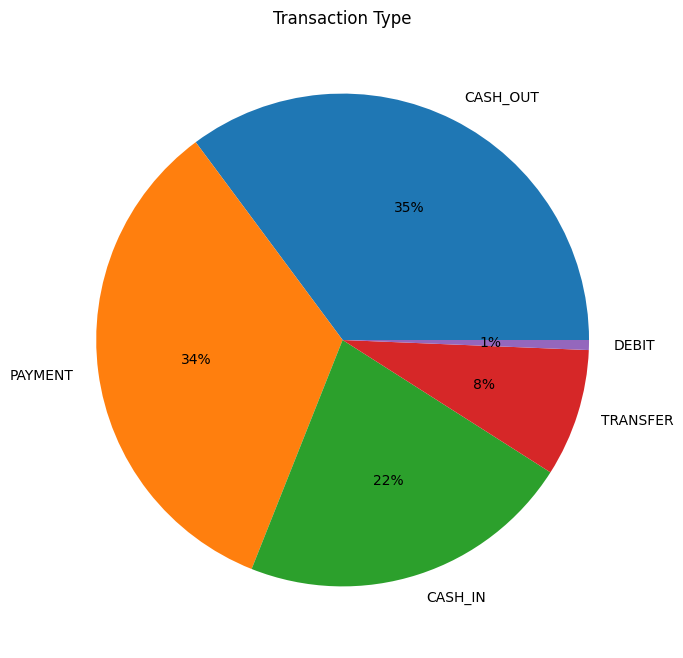

In [ ]:
plt.figure(figsize=(10,8))
plt.pie(data.type.value_counts().values,labels=data.type.value_counts().index, autopct='%.0f%%' )
plt.title("Transaction Type")
plt.show()

35% of transactions are cash_out type and 8% are transfer

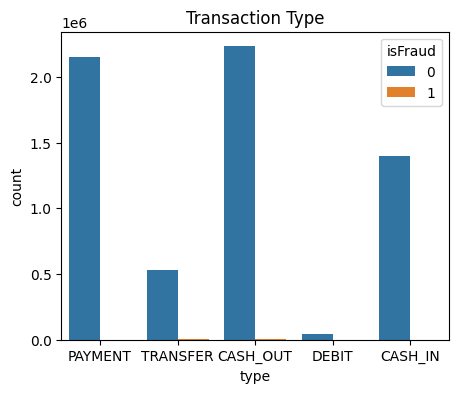

In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(x='type' ,data=data,hue='isFraud')
plt.title("Transaction Type")
plt.show()

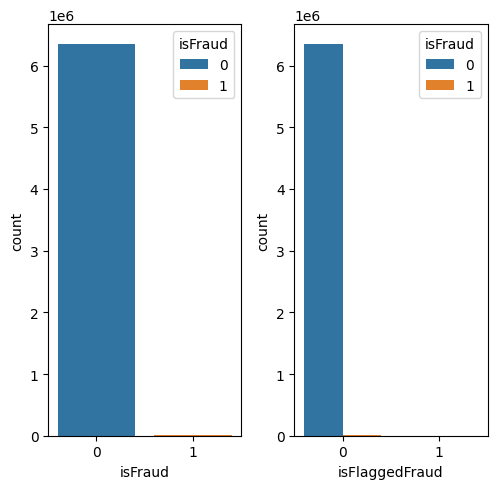

In [ ]:
cols=data[['isFraud','isFlaggedFraud' ]]
plt.figure(figsize=(10,5))
plt_num = 1
for i in cols:
  if plt_num <= 4:
        plt.subplot(1,4,plt_num)
        sns.countplot(x=i ,data=data,hue='isFraud')
  plt_num += 1
plt.tight_layout()
plt.show()

In [ ]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [ ]:
d=data.loc[(data['isFraud'] == 1)]
d

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


<Axes: xlabel='type', ylabel='step'>

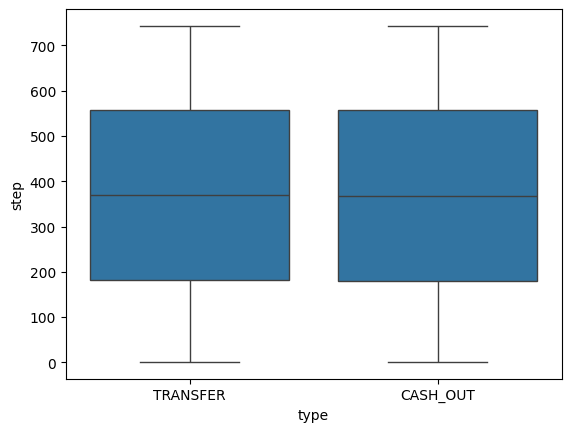

In [ ]:
sns.boxplot(data=d,y='step',x='type')

<Axes: ylabel='step'>

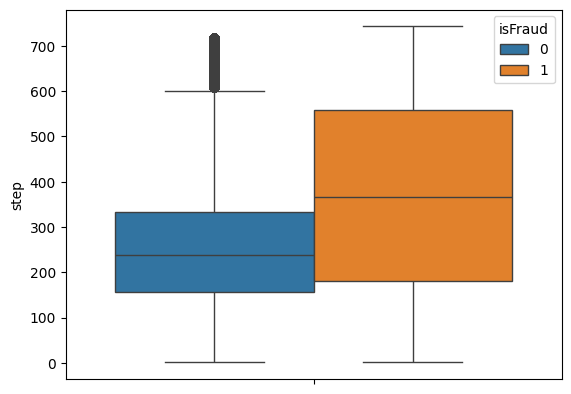

In [ ]:
sns.boxplot(data=data,y='step',hue='isFraud')

<Axes: ylabel='step'>

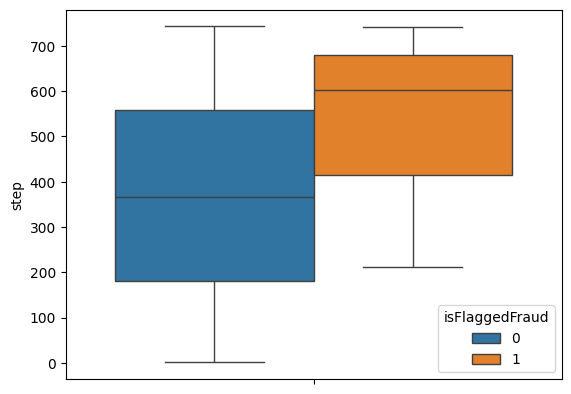

In [ ]:
sns.boxplot(data=d,y='step',hue='isFlaggedFraud')

* In step ,fraud transaction  q1 - q3 range is  150 to 550 and above 600 steps are considered as fraud transaction;  flaggedfraud transaction range is 400 to 650

**Handling outliers in step**


<Axes: xlabel='step'>

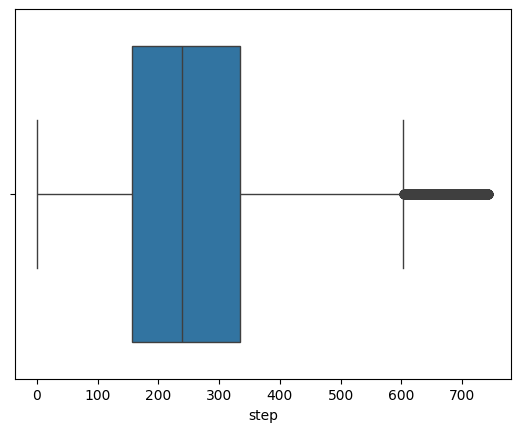

In [ ]:
sns.boxplot(data=data,x='step')

<Axes: xlabel='step', ylabel='Count'>

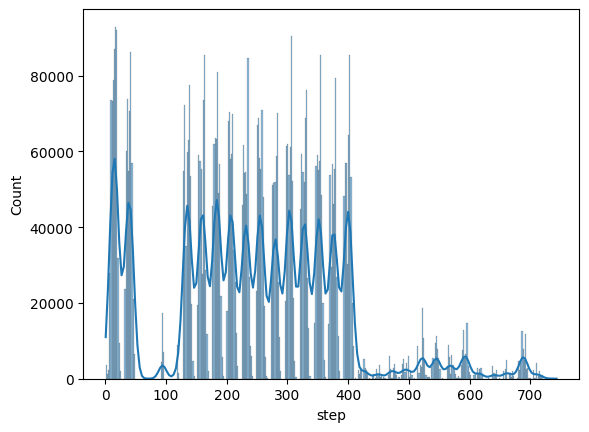

In [ ]:
sns.histplot(x='step', data=data,kde=True)


In [ ]:
from scipy import stats
IQR = stats.iqr(data['step'], interpolation = 'midpoint')
Q1 = data['step'].quantile(0.25)
Q3 = data['step'].quantile(0.75)
min_limit=Q1 - 1.5*IQR
max_limit=Q3 +1.5*IQR
print('lwlmt',min_limit)
print('uplmt',max_limit)
print('percentage of uplmt',len(data.loc[data['step'] > max_limit])/len(data)*100)
print('percentage of lwlmt',len(data.loc[data['step'] < min_limit])/len(data)*100)
s= len(data.loc[data['step'] > max_limit])/len(data)*100 + len(data.loc[data['step'] < min_limit])/len(data)*100
print('outlier percentage:',s)

lwlmt -112.5
uplmt 603.5
percentage of uplmt 1.6139263385209237
percentage of lwlmt 0.0
outlier percentage: 1.6139263385209237


In [ ]:
print("median is {}".format( data['step'].median()))
data.loc[data['step']>max_limit,'step']=data['step'].median()

median is 239.0


<Axes: >

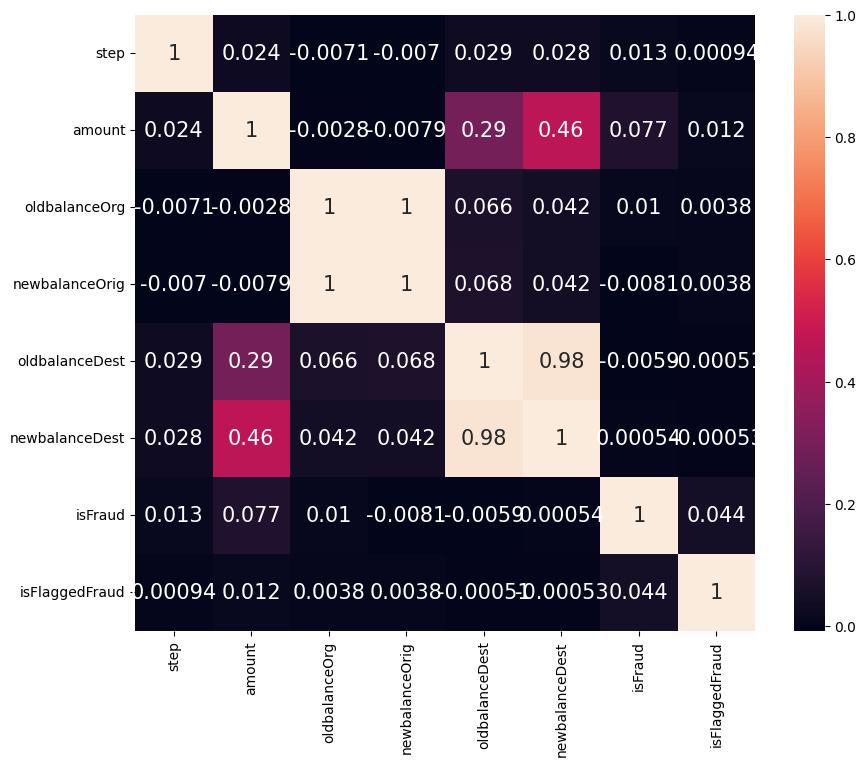

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True, annot_kws={"size":15})

In [ ]:
corr1=data.corr().isFraud.sort_values(ascending=False)
corr1


isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.013414
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64

* Droping columns which contains unique id nameDest,nameOrg
* Deleting Feature isFlaggedFraud because it is containing 16 as flagged and those are also in isfraud  and keeping isFraud as target.

In [ ]:
data.drop(['isFlaggedFraud','nameDest','nameOrig'],axis=1,inplace=True)

In [ ]:
print(data['type'].unique())
data['type'].value_counts()

['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']


CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

**All the fraud trnasactions belong to Transfer or Cash-out type, so discarding data corresponding to other types**

In [ ]:
data = data.loc[(data['type'].isin(['TRANSFER', 'CASH_OUT']))]
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,1,TRANSFER,181.00,181.0,0.0,0.0,0.00,1
3,1,CASH_OUT,181.00,181.0,0.0,21182.0,0.00,1
15,1,CASH_OUT,229133.94,15325.0,0.0,5083.0,51513.44,0
19,1,TRANSFER,215310.30,705.0,0.0,22425.0,0.00,0
24,1,TRANSFER,311685.89,10835.0,0.0,6267.0,2719172.89,0


**Converting Categorical values**

In [ ]:
data['type'].value_counts()

CASH_OUT    2237500
TRANSFER     532909
Name: type, dtype: int64

In [ ]:
fre_en={'type':{'CASH_OUT':1 , 'TRANSFER':0 }}
data = data.replace(fre_en)
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,1,0,181.00,181.0,0.0,0.0,0.00,1
3,1,1,181.00,181.0,0.0,21182.0,0.00,1
15,1,1,229133.94,15325.0,0.0,5083.0,51513.44,0
19,1,0,215310.30,705.0,0.0,22425.0,0.00,0
24,1,0,311685.89,10835.0,0.0,6267.0,2719172.89,0


In [ ]:
data.to_csv('fraud_prepro.csv')

In [4]:
data=pd.read_csv('/content/gdrive/My Drive/fraud_prepro.csv')

In [5]:
data.head()

,Unnamed: 0,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,2,1,0,181.00,181.0,0.0,0.0,0.00,1
1,3,1,1,181.00,181.0,0.0,21182.0,0.00,1
2,15,1,1,229133.94,15325.0,0.0,5083.0,51513.44,0
3,19,1,0,215310.30,705.0,0.0,22425.0,0.00,0
4,24,1,0,311685.89,10835.0,0.0,6267.0,2719172.89,0


In [7]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [ ]:
data.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

**'step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud'** These are the features selected for the model creation ans isFraud is the target

In [8]:
from sklearn.preprocessing import StandardScaler
stanscale=StandardScaler()
stdf=stanscale.fit_transform(data.drop(['isFraud','type'],axis=1))

In [9]:
x = data.drop(['isFraud'],axis=1)
y = data.isFraud

In [10]:
from sklearn.model_selection import train_test_split
X_train,x_test,Y_train,y_test=train_test_split(x, y,random_state=3)
print(X_train.shape)
print(x_test.shape)

(2077806, 7)
(692603, 7)


**Balancing the target column using SMOTE:**

Data is not balanced it has more data about isFraud:0; so before modellong we have to balance the data.So Iam choosing SMOTE othermethod will cause data duplication or data loss

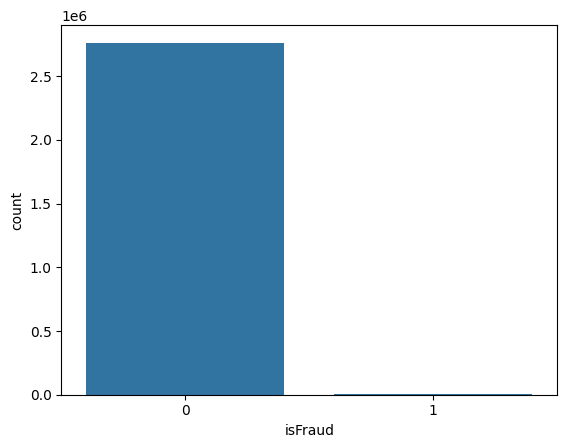

In [11]:
sns.countplot(x=data['isFraud'])
plt.show()

In [12]:
!pip install imblearn

In [13]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [14]:
# Smote is always applied on train data(X_train and Y_train)
x_train, y_train = smote.fit_resample(X_train,Y_train)

In [15]:
from collections import Counter
print("Actual Classes",Counter(Y_train))
print("SMOTE Classes",Counter(y_train))

Actual Classes Counter({0: 2071667, 1: 6139})
SMOTE Classes Counter({0: 2071667, 1: 2071667})


# **Model creation and evaluation**

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

In [17]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,precision_score,recall_score,f1_score, roc_auc_score

In [23]:
#  function to train and test model
def train_test_model(model, model_name, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_validation=model.predict(x_train)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred,average='weighted')
    recall = recall_score(y_test, y_pred,average='weighted')
    f1 = f1_score(y_test, y_pred,average='weighted')
    cf=confusion_matrix(y_test,y_pred)
    valid = accuracy_score(y_train,y_validation)
    model_eval = pd.DataFrame({'Accuracy': [accuracy],
                                'Precision': [precision],
                                'Recall': [recall],
                                'F1 Score': [f1],
                                 'confusion_matrix':[cf],
                               'validation':[valid]
                               },

                                   index=[model_name])

    return model_eval

* Finding K value for KNeighbors

In [ ]:
error_rate=[]

for i in range(2,11):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    error_rate.append(np.mean(y_pred!=y_test))
error_rate

[0.004835381885437978,
 0.007330317656723982,
 0.007011231542456501,
 0.009025372399484264,
 0.00872216839950159,
 0.010228081599415538,
 0.00991188314229075,
 0.011273413485070091,
 0.01095432737080261]

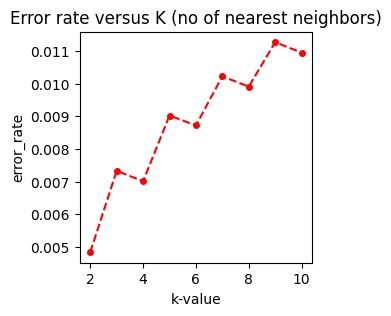

In [ ]:
plt.figure(figsize=(3,3))
plt.plot(range(2,11),error_rate,color="red",linestyle="dashed",marker='o',markersize=4)
plt.title("Error rate versus K (no of nearest neighbors)")
plt.xlabel("k-value")
plt.ylabel("error_rate")
plt.show()

In [24]:
models={
    'Logistic Regression':LogisticRegression()
    }
models_eval = pd.DataFrame()
for model_name, model in models.items():
  models_eval = models_eval.append(train_test_model(model, model_name, x_train, x_test, y_train, y_test))
models_eval

,Accuracy,Precision,Recall,F1 Score,confusion_matrix,validation
Logistic Regression,0.92093,0.996867,0.92093,0.956044,"[[635918, 54611], [153, 1921]]",0.926388


In [25]:
models={
        'KNN': KNeighborsClassifier(n_neighbors=2)

    }
models_eval = pd.DataFrame()
for model_name, model in models.items():
  models_eval = models_eval.append(train_test_model(model, model_name, x_train, x_test, y_train, y_test))
models_eval

,Accuracy,Precision,Recall,F1 Score,confusion_matrix,validation
KNN,0.995114,0.997732,0.995114,0.996108,"[[687403, 3126], [258, 1816]]",0.999783


Report:
* I created a function for model taining for test,validation and evaluation
I choose two models ,
* without hyperparameter tunning **logistic regression** gives 92% of accuracy in test and validation data.Doing hyperparameter tunning will help to learn this model better
* **KNN** gives 99% of accuracy in both test and validation data without tuning.
 KNN performs better than logestic regression


Suggestions:
* step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest' and'newbalanceDest These data should be considered for predict fraudlent.
* We can also check the login activities with time taken it will also help as to create better model
* Also using cyber security concepts will improve the model
* Once its detect as a fraud transaction Creating alert or freezing the fraudlent account or locking it temporarly will reduce fraudlent transaction
* also confirming messege (with transaction id,account name holder, recipient details and amount) with otp before transfering the amount